# Loading Important Libraries

In [1]:
import pandas as pd
import numpy as np

# Train test for splitting for learning
from sklearn.model_selection import train_test_split

# Machine Learning Models validation and score metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import warnings


from sklearn.feature_selection import SelectKBest, chi2,f_classif,RFE
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV



# Classification and plotting graph
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Unsupervised Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Imported Transformed Database

In [2]:
df=pd.read_csv("transformed_CVD_data.csv")
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
5,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
6,60.583562,1,157,93.0,130,80,3,1,0,0,1,0
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
8,48.405479,1,158,71.0,110,70,1,1,0,0,1,0
9,54.339726,1,164,68.0,110,60,1,1,0,0,0,0


# Data Split Into Features & Target

In [3]:
y=df['cardio']
x=df.drop(['cardio'],axis=1)

In [4]:
#stratifing the data for equalizing the classification
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25,random_state=23,stratify=y)

# Semi Labeled Machine Learning Model

Text(0, 0.5, 'Error Rate')

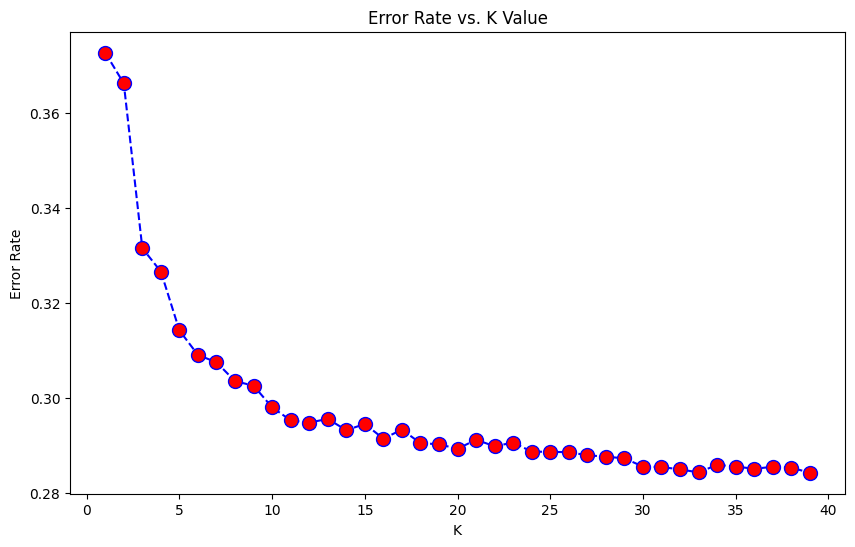

In [6]:
error_rate = []
for i in range(1,40):
    knn_model1 = KNeighborsClassifier(n_neighbors=i)
    knn_model1.fit(xtr,ytr)
    pred_i = knn_model1.predict(xts)
    error_rate.append(np.mean(pred_i != yts))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

# Refactored Code

Text(0, 0.5, 'Error Rate')

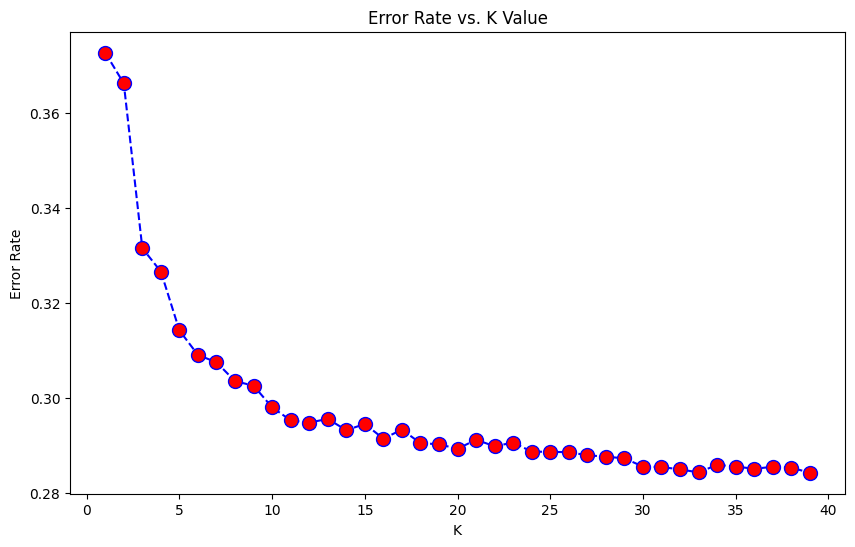

In [5]:
# Refactored Code For the Elbow Curve
error_rate = []
# Verifing the Elbowcurve for the most suitable K Neighbour
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i) # Instantiating the ML Model
    knn.fit(xtr,ytr) # Fitting the training data with the model
    pred_i = knn.predict(xts) # Predicting the test cases to verify accuracy
    error_rate.append(np.mean(pred_i != yts))
# Plotting the Elbow to determine K
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

KNeighborsClassifier(n_neighbors=8) Test Acurracy: 0.7041501976284585
KNeighborsClassifier(n_neighbors=8) Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.73      8608
           1       0.73      0.60      0.66      8259

    accuracy                           0.70     16867
   macro avg       0.70      0.69      0.69     16867
weighted avg       0.70      0.70      0.69     16867

KNeighborsClassifier(n_neighbors=8) Confusion Matrix:
 [[6778 1830]
 [3290 4969]]


Text(8.222222222222223, 0.5, 'Predicted Value')

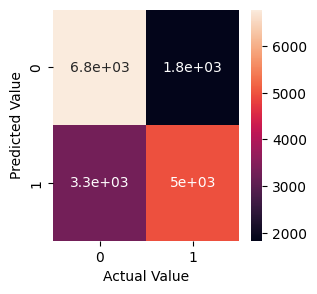

In [11]:
knn=KNeighborsClassifier(n_neighbors=8,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(xtr,ytr)
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(knn, xtr, ytr, cv=cv)
y_pred=knn.predict(xts)
print("{} Test Acurracy: {}".format(knn, max(scores)))

print("{} Classification Report:\n {}".format(knn, classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(knn, confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



# K Means Algorithms

In [36]:

def optimize_kmeans_hyperparameters(X, n_clusters_range, max_iter=100):

    # Define the parameter grid.
    param_grid = {
      'n_clusters': n_clusters_range,
      'init': ['k-means++'],
      'max_iter': [max_iter],
      
    }

    # Create a KMeans classifier.
    kmeans = KMeans()

    # Create a grid search object.
    grid_search = GridSearchCV(kmeans, param_grid, cv=5)

    # Fit the grid search object to the data.
    grid_search.fit(X)

    # Get the best hyperparameters.
    best_params = grid_search.best_params_

    # Fit the KMeans classifier with the best hyperparameters.
    kmeans = KMeans(**best_params)
    kmeans.fit(X)

    # Return the fitted KMeans classifier.
    return kmeans

# Example usage:


n_clusters_range = range(2, 8)

# Optimize the K-means algorithm hyperparameters.
kmeans = optimize_kmeans_hyperparameters(x, n_clusters_range)

# Print the best hyperparameters.
print(kmeans.get_params())


{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 7, 'n_init': 10, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


KMeans(max_iter=100, n_clusters=2) Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74      8608
           1       0.77      0.56      0.65      8259

    accuracy                           0.70     16867
   macro avg       0.72      0.70      0.70     16867
weighted avg       0.72      0.70      0.70     16867

KMeans(max_iter=100, n_clusters=2) Confusion Matrix:
 [[7243 1365]
 [3640 4619]]


Text(8.222222222222223, 0.5, 'Predicted Value')

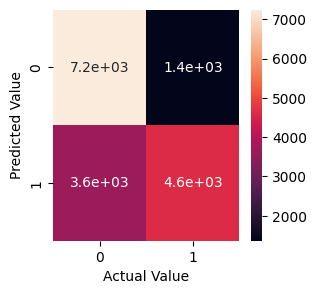

In [39]:
kmeans = KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=100, n_clusters=2, n_init=10, random_state=None, tol=1e-4, verbose=0)
kmeans.fit(xtr)
cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
scores = cross_val_score(kmeans, xtr, cv=cv)
y_pred=kmeans.predict(xts)

print("{} Classification Report:\n {}".format(kmeans, classification_report(yts,y_pred)))

print("{} Confusion Matrix:\n {}".format(kmeans, confusion_matrix(yts,y_pred)))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")



# Refactored Code For Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline for each algorithm
kmeans_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=3))
])

agglomerative_clustering_pipeline = Pipeline([
    ('agglomerative_clustering', AgglomerativeClustering(n_clusters=3))
])

hclustering_pipeline = Pipeline([
    ('hclustering', Birch(n_clusters=3))
])


# Fit the pipelines to the data
kmeans_pipeline.fit(xtr)
agglomerative_clustering_pipeline.fit(xtr)
hclustering_pipeline.fit(xtr)
dbscan_pipeline.fit(xtr)

# Make predictions
kmeans_predictions = kmeans_pipeline.predict(xts)
agglomerative_clustering_predictions = agglomerative_clustering_pipeline.predict(xts)
hclustering_predictions = hclustering_pipeline.predict(xts)


# Calculate the accuracy and classification report for each algorithm
kmeans_accuracy = accuracy_score(yts, kmeans_predictions)
agglomerative_clustering_accuracy = accuracy_score(yts, agglomerative_clustering_predictions)
hclustering_accuracy = accuracy_score(yts, hclustering_predictions)

kmeans_classification_report = classification_report(yts, kmeans_predictions)
agglomerative_clustering_classification_report = classification_report(yts, agglomerative_clustering_predictions)
hclustering_classification_report = classification_report(yts, hclustering_predictions)

# Print the results
print('KMeans accuracy:', kmeans_accuracy)
print('Agglomerative Clustering accuracy:', agglomerative_clustering_accuracy)
print('HClustering accuracy:', hclustering_accuracy)

print('KMeans classification report:')
print(kmeans_classification_report)

print('Agglomerative Clustering classification report:')
print(agglomerative_clustering_classification_report)

print('HClustering classification report:')
print(hclustering_classification_report)


NameError: name 'dbscan_pipeline' is not defined

# Pipeline Is Just A Trial For Future Work !!